## Setup and Import Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime # Convert string to datetime format
import seaborn as sns

In [5]:
# Dataset
HR_data = pd.read_csv('/content/HR_Dataset.csv')

# Check table
HR_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [6]:
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

## Data Cleaning

In [7]:
# Remove missing or NaN (Not a Number) values from a DataFrame
HR_data = HR_data.dropna(how='all')

# Check for duplicates
HR_data = HR_data.drop_duplicates()


# PANDAS QUESTIONS

## Question 1
How would you calculate the median salary for employees who are still actively employed?

In [8]:
status = HR_data['EmploymentStatus']
status

,EmploymentStatus
0,Active
1,Voluntarily Terminated
2,Voluntarily Terminated
3,Active
4,Voluntarily Terminated
...,...
306,Active
307,Voluntarily Terminated
308,Active
309,Active


In [9]:
# Changing the space in values to snake case
HR_data['EmploymentStatus'] = HR_data['EmploymentStatus'].replace(' ', '_', regex=True) # regex -> all type of spaces
HR_data['EmploymentStatus']


,EmploymentStatus
0,Active
1,Voluntarily_Terminated
2,Voluntarily_Terminated
3,Active
4,Voluntarily_Terminated
...,...
306,Active
307,Voluntarily_Terminated
308,Active
309,Active


In [10]:
# Filter the Active employee
active_employees = HR_data[HR_data['EmploymentStatus'] == 'Active']
active_employees

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,"Wolk, Hang T",10174,0,0,0,1,5,3,0,60446,...,David Stanley,14.0,LinkedIn,Fully Meets,3.40,4,0,2/21/2019,0,14
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [11]:
# Count the median salary for employees who are still actively employed
median_salary = active_employees['Salary'].median()
print(f'The median salary for employees who are still actively employed is ${median_salary}')

The median salary for employees who are still actively employed is $63051.0


## Question 2
How can you filter the DataFrame to show employees who have been terminated and had a performance score of "Exceeds"?

In [12]:
# Filter Employment Status
terminated_exceeds = HR_data[(HR_data['EmploymentStatus'] == 'Voluntarily_Terminated') & (HR_data['PerformanceScore'] == 'Exceeds')]
terminated_exceeds

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
143,"Johnson, George",10034,1,1,1,5,5,4,0,46837,...,Michael Albert,22.0,CareerBuilder,Exceeds,4.7,4,0,2/14/2018,0,9
174,"Lynch, Lindsay",10004,0,0,0,5,5,4,1,47434,...,Webster Butler,39.0,Diversity Job Fair,Exceeds,5.0,4,0,2/2/2015,0,17
212,"Patronick, Lucas",10005,0,0,1,5,4,4,1,108987,...,Alex Sweetwater,10.0,Diversity Job Fair,Exceeds,5.0,5,3,8/16/2015,0,13
217,"Peters, Lauren",10032,1,1,0,5,5,4,0,57954,...,Ketsia Liebig,19.0,Indeed,Exceeds,4.2,5,0,1/10/2013,0,12
265,"Squatrito, Kristen",10030,0,2,0,5,5,4,0,62425,...,David Stanley,14.0,LinkedIn,Exceeds,4.1,4,0,3/2/2015,0,16
289,"Veera, Abdellah",10014,0,2,1,5,5,4,0,58523,...,Kissy Sullivan,20.0,LinkedIn,Exceeds,4.5,5,0,2/1/2016,0,15
304,"Winthrop, Jordan",10033,0,0,1,5,5,4,0,70507,...,Brannon Miller,12.0,LinkedIn,Exceeds,5.0,3,0,1/19/2016,0,7


In [13]:
terminated_exceeds_names = terminated_exceeds['Employee_Name']
print(terminated_exceeds_names)

143       Johnson, George
174        Lynch, Lindsay
212      Patronick, Lucas
217        Peters, Lauren
265    Squatrito, Kristen
289      Veera, Abdellah 
304    Winthrop, Jordan  
Name: Employee_Name, dtype: object


## Question 3
How would you group the data by Department and GenderID to calculate the average engagement survey score for each combination?

In [14]:
grouped_data = HR_data.groupby(['Department', 'GenderID'])['EngagementSurvey'].mean().reset_index() # column
grouped_data

,Department,GenderID,EngagementSurvey
0,Admin Offices,0,4.423333
1,Admin Offices,1,4.333333
2,Executive Office,0,4.830000
3,IT/IS,0,4.287273
4,IT/IS,1,4.049286
5,Production,0,4.111984
6,Production,1,4.156265
7,Sales,0,4.092000
8,Sales,1,3.562500
9,Software Engineering,0,3.765000


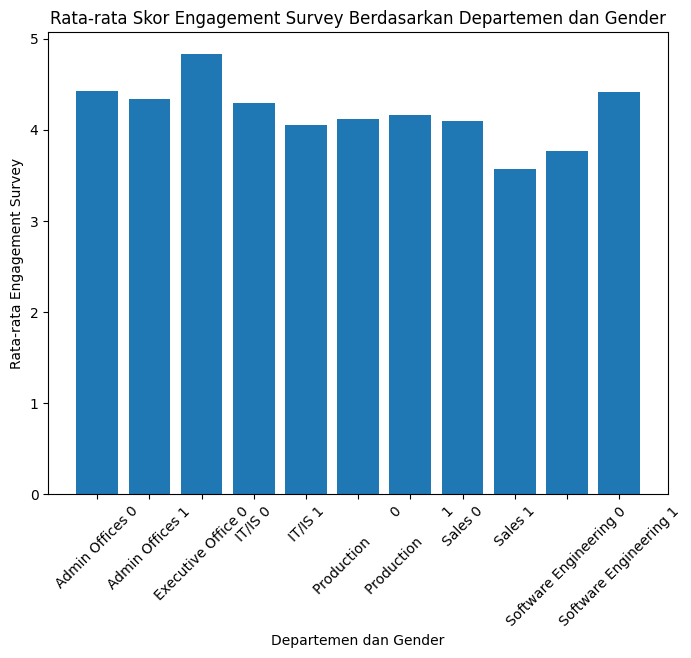

In [15]:
import matplotlib.pyplot as plt

# Membuat chart yang lebih sederhana
plt.figure(figsize=(8, 6))

# Menggabungkan 'Department' dan 'GenderID' setelah mengubah GenderID menjadi string
plt.bar(grouped_data['Department'] + ' ' + grouped_data['GenderID'].astype(str), grouped_data['EngagementSurvey'])

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Skor Engagement Survey Berdasarkan Departemen dan Gender')
plt.xlabel('Departemen dan Gender')
plt.ylabel('Rata-rata Engagement Survey')

# Menampilkan chart
plt.xticks(rotation=45)  # Memutar label sumbu X agar lebih jelas
plt.show()


## Question 4
How can you find the most common recruitment source for terminated employees?

In [16]:
# Filter voluntarily terminated
terminated_employees = HR_data[HR_data['EmploymentStatus'] == 'Voluntarily_Terminated']
terminated_employees

# Filter most common source from voluntarily terminated
most_common_source = terminated_employees['RecruitmentSource'].mode() # mode -> most value
most_common_source

,RecruitmentSource
0,Google Search


## Question 5
How would you sort the DataFrame by the number of absences, and then by the number of days late in the last 30 days, both in descending order?

In [17]:
HR_data_sorted = HR_data.sort_values(by=['Absences', 'DaysLateLast30'], ascending=[False, False])
HR_data_sorted

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
263,"Sparks, Taylor",10302,1,1,0,1,5,1,0,64021,...,Brannon Miller,12.0,Indeed,PIP,2.40,2,1,2/25/2019,6,20
15,"Bates, Norman",10061,0,0,1,4,5,3,0,57834,...,Kelley Spirea,18.0,Google Search,Fully Meets,5.00,4,0,4/5/2017,0,20
93,"Fitzpatrick, Michael J",10093,0,0,1,5,5,3,0,72609,...,Amy Dunn,11.0,Google Search,Fully Meets,4.76,5,0,4/5/2013,0,20
107,"Givens, Myriam",10255,0,0,0,1,6,3,0,61555,...,Lynn Daneault,21.0,Indeed,Fully Meets,4.50,5,0,1/25/2019,0,20
109,"Goeth, Amon",10228,1,1,1,1,3,3,0,74679,...,Peter Monroe,7.0,LinkedIn,Fully Meets,4.30,5,7,1/10/2019,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"Johnston, Yen",10036,0,0,0,1,5,4,0,63322,...,Brannon Miller,12.0,LinkedIn,Exceeds,4.30,3,0,1/11/2019,0,1
191,"Monterro, Luisa",10025,0,0,0,1,5,4,0,72460,...,Kissy Sullivan,20.0,Indeed,Exceeds,4.70,3,0,1/14/2019,0,1
207,"Onque, Jasmine",10121,0,0,0,1,6,3,0,63051,...,Lynn Daneault,21.0,Indeed,Fully Meets,4.28,3,0,1/25/2019,0,1
274,"Szabo, Andrew",10024,0,0,1,1,4,4,0,92989,...,Alex Sweetwater,10.0,LinkedIn,Exceeds,4.50,5,5,2/18/2019,0,1


## Question 6
How can you identify and drop any rows where the PerformanceScore is missing, and
then calculate the average performance score for the remaining data?

In [18]:
# Remove NA
HR_data_cleaned = HR_data.dropna(subset=['PerformanceScore'])
HR_data_cleaned

# Value count for each category in PerformanceScore
category_counts = HR_data_cleaned['PerformanceScore'].value_counts()
category_counts

,count
PerformanceScore,
Fully Meets,243
Exceeds,37
Needs Improvement,18
PIP,13


In [19]:
# Mapping performance score to number
score_mapping = {
    'Exceeds': 4,
    'Fully Meets': 3,
    'Needs Improvement': 2,
    'PIP': 1
}

# Count PerformanceScore with mapping
HR_data['PerformanceScoreMapped'] = HR_data['PerformanceScore'].map(score_mapping)

# Average PerformanceScore
average_performance_score = HR_data['PerformanceScoreMapped'].mean()
print(round(average_performance_score,2))


2.98


## Question 7
How would you create a new column that calculates each employee's tenure in years and then find the average tenure for each department?

Note:
* Average Tenure -> convert to datetime
* Datetime format allows you to do date calculations
* Tenure = DateofTermination - DateofHire

In [20]:
# Filtering DateofTermination and DateofHire
HR_data['DateofTermination'] = pd.to_datetime(HR_data['DateofTermination'])
HR_data['DateofHire'] = pd.to_datetime(HR_data['DateofHire'])

# Tenure calculation
HR_data['Tenure'] = (HR_data['DateofTermination'] - HR_data['DateofHire'])

# Take out only the total number of days -> dat.days
HR_data['Tenure'] = HR_data['Tenure'].dt.days
HR_data['Tenure']


,Tenure
0,NaN
1,444.0
2,447.0
3,NaN
4,1884.0
...,...
306,NaN
307,2583.0
308,NaN
309,NaN


Note:
* A normal year has 365 days, but every 4 years there is a leap year (with 366 days)
* To average that out over time, the true average length of a year is 365 + 0.25 = 365.25 days


In [21]:
# Each employee's individual tenure in years
HR_data['Tenure'] = HR_data['Tenure']/ 365.25
HR_data['Tenure']

# Note:NaN result -> If an employee does not have a DateofTermination (still working / active)


,Tenure
0,NaN
1,1.215606
2,1.223819
3,NaN
4,5.158111
...,...
306,NaN
307,7.071869
308,NaN
309,NaN


In [22]:
# Average tenure for each department
average_tenure_by_department = HR_data.groupby('Department')['Tenure']
average_tenure_by_department = average_tenure_by_department.mean()

# Puts the grouped column back into a normal column -> reset_index()
average_tenure_by_department = average_tenure_by_department.reset_index()
average_tenure_by_department

,Department,Tenure
0,Admin Offices,1.078713
1,Executive Office,NaN
2,IT/IS,1.749760
3,Production,3.754385
4,Sales,2.625599
5,Software Engineering,3.889802


## Question 8
How can you find the top 5 employees with the highest special projects count who have also been terminated for cause, and display their relevant details?

In [23]:
terminated_group_data = HR_data.groupby(['TermReason', 'Employee_Name', 'Department'])['SpecialProjectsCount'].sum()
terminated_group_data.sort_values(ascending=False).head(5)

TermReason                     Employee_Name    Department
N/A-StillEmployed              Warfield, Sarah  IT/IS         8
                               Daniele, Ann     IT/IS         8
no-call, no-show               Voldemort, Lord  IT/IS         7
N/A-StillEmployed              Goeth, Amon      IT/IS         7
Learned that he is a gangster  Booth, Frank     IT/IS         7
Name: SpecialProjectsCount, dtype: int64

# SEABORN QUESTIONS

## Question 1
What is the distribution of employee salaries?

Text(13.819444444444445, 0.5, 'Frequency')

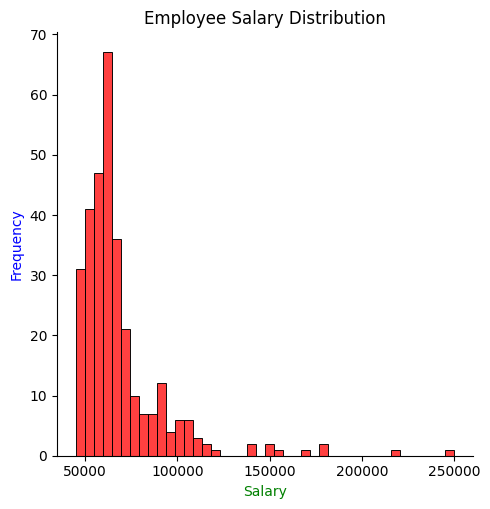

In [24]:
sns.displot(HR_data['Salary'], color='red')
plt.title('Employee Salary Distribution')
plt.xlabel('Salary', color='green')
plt.ylabel('Frequency', color='blue')

## Question 2
How does employee satisfaction vary across different departments?

In [25]:
# Grouping column Department and EmpSatisfaction
avg_satisfaction = HR_data.groupby('Department')['EmpSatisfaction'].mean().reset_index()

# Sorting from the highest
avg_satisfaction.sort_values(by='EmpSatisfaction', ascending=False)

,Department,EmpSatisfaction
5,Software Engineering,4.090909
4,Sales,4.032258
2,IT/IS,3.960000
3,Production,3.861244
0,Admin Offices,3.555556
1,Executive Office,3.000000


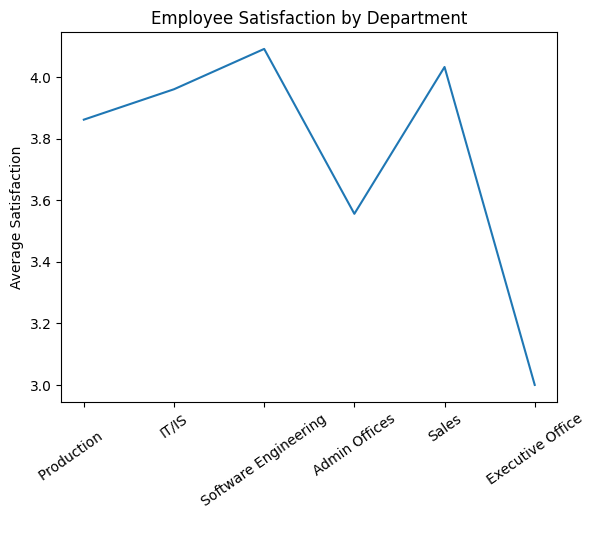

In [26]:
# Plot (Line)
sns.lineplot(data=HR_data,
             x = 'Department',
             y = 'EmpSatisfaction',
             errorbar=None)
plt.title('Employee Satisfaction by Department')
plt.xlabel(' ')
plt.ylabel('Average Satisfaction')
plt.xticks(rotation=35)
plt.show()


Note: `errorbar=None`: Tidak menampilkan garis error (default-nya Seaborn akan menampilkan standar deviasi sebagai garis error).


## Question 3
What is the gender distribution across various job positions?

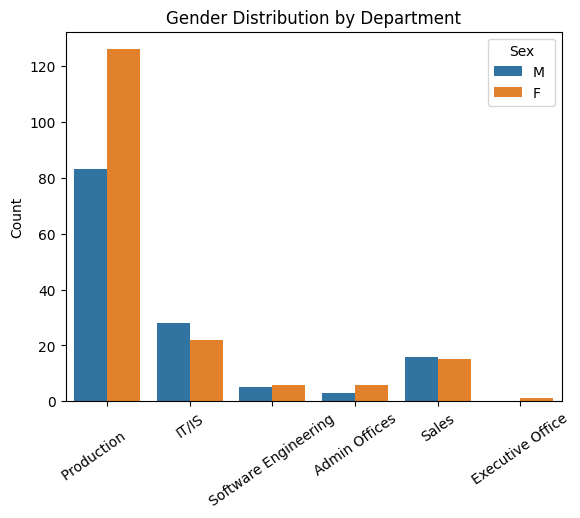

In [27]:
sns.countplot(x='Department', hue='Sex', data=HR_data)
plt.title('Gender Distribution by Department')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=35)
plt.show()

## Question 4
How does performance score correlate with engagement survey results?

In [73]:
# Checking if the two columns have missing values
HR_data[['PerformanceScore', 'EngagementSurvey']].isnull().sum()

# Map performance scores to numbers
performance_map = {
    'Exceeds': 4,
    'Fully Meets': 3,
    'Needs Improvement': 2,
    'PIP': 1
}

HR_data['PerformanceScoreNum'] = HR_data['PerformanceScore'].map(performance_map)


# Remove rows with missing data
HR_clean = HR_data[['PerformanceScoreNum', 'EngagementSurvey']].dropna()

# Find out how strong the relationship is
correlation = HR_clean['PerformanceScoreNum'].corr(HR_clean['EngagementSurvey'])
print(f"Correlation: {correlation:.2f}")


Correlation: 0.58


**Interpretation:**
* A correlation close to +1 means strong positive relationship.

* A correlation close to -1 means strong negative relationship.

* A correlation around 0 means no significant linear relationship.

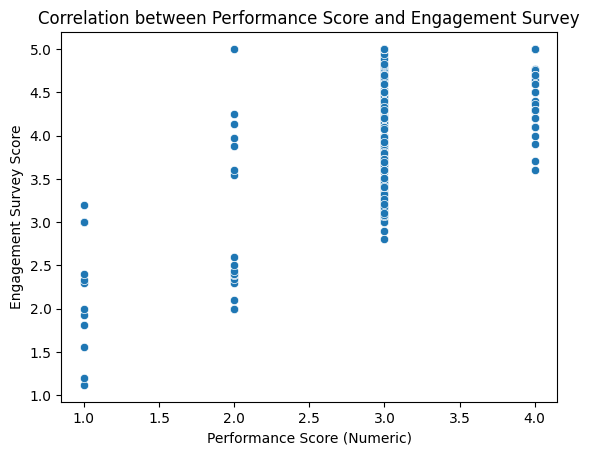

In [78]:
# Visualize with scatter plot
sns.scatterplot(data = HR_clean,
                x='PerformanceScoreNum',
                y='EngagementSurvey')

plt.title('Correlation between Performance Score and Engagement Survey')
plt.xlabel('Performance Score (Numeric)')
plt.ylabel('Engagement Survey Score')
plt.show()



**Interpretation:**
- There appears to be a positive correlation: employees with higher performance scores generally report higher engagement survey scores.
- However, there is some spread in engagement scores for each performance level, suggesting variability in engagement even among high performers.

**Suggestions:**
- *Leverage High Performers with High Engagement*:
   - Employees with performance scores of 3 and 4 and engagement scores above 4 could be considered for leadership or mentoring roles.
- *Support for Low Performers*:
   - Those with performance score 1 and low engagement may need targeted support, training, or role realignment.

## Question 5
Is there a relationship between tenure (length of employment) and salary?

In [28]:
# Date of Termination -> DOT
HR_data['DOT'] = HR_data['DateofTermination'].copy()
HR_data['DOT']

,DOT
0,NaT
1,2016-06-16
2,2012-09-24
3,NaT
4,2016-09-06
...,...
306,NaT
307,2015-09-29
308,NaT
309,NaT


Note: NaT -> Not a Time (value is missing, the employee still active)

In [29]:
# Removing employee that still active in current date
current_date = pd.to_datetime('today').date()
HR_data['DOT'] = HR_data['DOT'].fillna(current_date)
HR_data['DOT']

,DOT
0,2025-04-29
1,2016-06-16 00:00:00
2,2012-09-24 00:00:00
3,2025-04-29
4,2016-09-06 00:00:00
...,...
306,2025-04-29
307,2015-09-29 00:00:00
308,2025-04-29
309,2025-04-29


In [30]:
# Convert data into datetime
HR_data['DateofHire'] = pd.to_datetime(HR_data['DateofHire'])
HR_data['DOT'] =pd.to_datetime(HR_data['DOT'])

# Length of Employment -> LengthofEmp
HR_data['LengthofEmp'] = HR_data['DOT'] - HR_data['DateofHire']
HR_data['LengthofEmp']

,LengthofEmp
0,5047 days
1,444 days
2,447 days
3,6322 days
4,1884 days
...,...
306,3949 days
307,2583 days
308,5498 days
309,3683 days


In [31]:
# Keep only the numeric values (removing 'days')
HR_data['LengthofEmp'] = HR_data['LengthofEmp'].astype(str)
HR_data['LengthofEmp'] = HR_data['LengthofEmp'].str.replace('days', '')
HR_data['LengthofEmp'].head()

,LengthofEmp
0,5047
1,444
2,447
3,6322
4,1884


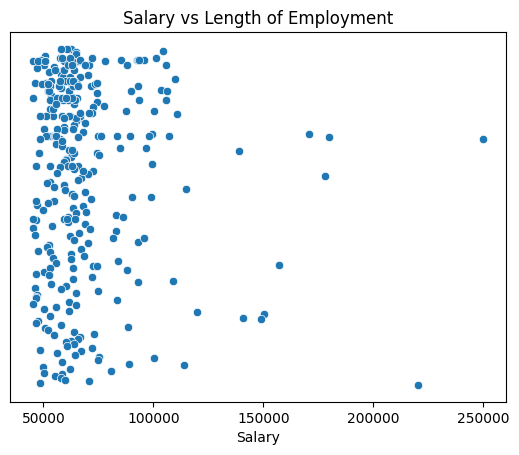

In [32]:
# Plot (Scatterplot)
sns.scatterplot(data = HR_data,
                x= 'Salary',
                y = 'LengthofEmp')

# Hide y-axis
# Current_axes = plt.gca()
plt.gca().get_yaxis().set_visible(False)


plt.title('Salary vs Length of Employment')
plt.xlabel('Salary')
plt.ylabel('Length of Employment')
plt.show()


**Summary of the Chart:**
- Most employees' length of employment is clustered within the 50,000–100,000 salary range.

- Some employees earn very high salaries but don’t necessarily have long tenures.

 **Analysis:**
 This might be related to the employees' satisfaction where Executive Officers (which have the highest salaries) has the lowest satisfaction average score.

**Recommendations:**
1. Survey executives to find root causes (e.g., leadership, culture, workload).
2. Improve non-monetary rewards (e.g., autonomy, recognition, growth).
3. Track satisfaction regularly to guide HR strategies.

## Question 6
What is the distribution of employees across different recruitment sources?

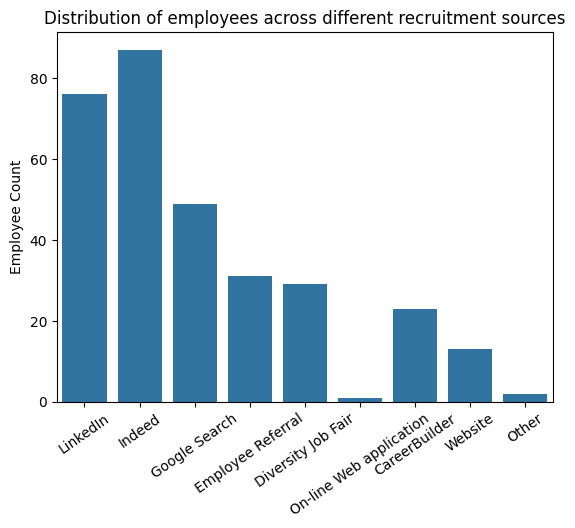

In [36]:
sns.barplot(data=HR_data,
            x = 'RecruitmentSource',
            y = 'EmpID',
            estimator = 'count',
            errorbar = None)

plt.title('Distribution of employees across different recruitment sources')
plt.xlabel('')
plt.ylabel('Employee Count')
plt.xticks(rotation=35)
plt.show()

## Question 7
How does employee absenteeism vary by department?

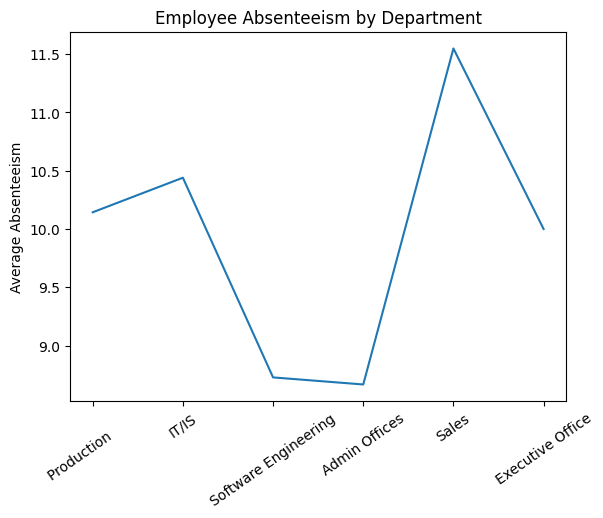

In [37]:
sns.lineplot(data=HR_data,
             x = 'Department',
             y = 'Absences',
             estimator = 'mean',
             errorbar = None)

plt.title('Employee Absenteeism by Department')
plt.xlabel('')
plt.ylabel('Average Absenteeism')
plt.xticks(rotation=35)
plt.show()

## Question 8
What is the average age of employees in different job roles or departments?

In [49]:
# Date of Birth -> DOB
# Convert DOB to datetime
HR_data['DOB'] = pd.to_datetime(HR_data.DOB, format="%m/%d/%y")

# Filter the DOB only 'year'
HR_data['YearOfBirth'] = HR_data['DOB'].dt.year

# Get the current year
current_year_DOB = pd.to_datetime('today').year

# Manually adjust the year to be in the 1900s if necessary
def adjust_date(x):
    if x > current_year_DOB:   # current year = 2025
        return x - 100
    else:
        return x

# Apply to Year of Birth
HR_data['YearOfBirth'] = HR_data['YearOfBirth'].apply(adjust_date)

# Calculate Age
HR_data['Age'] = current_year_DOB - HR_data['YearOfBirth']

HR_data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,PerformanceScoreMapped,Tenure,DOT,LengthofEmp,YearOfBirth,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,0,1/17/2019,0,1,4,NaN,2025-04-29,5047,1983,42
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,6,2/24/2016,0,17,3,1.215606,2016-06-16,444,1975,50
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,0,5/15/2012,0,3,3,1.223819,2012-09-24,447,1988,37
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,0,1/3/2019,0,15,3,NaN,2025-04-29,6322,1988,37
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,0,2/1/2016,0,2,3,5.158111,2016-09-06,1884,1989,36


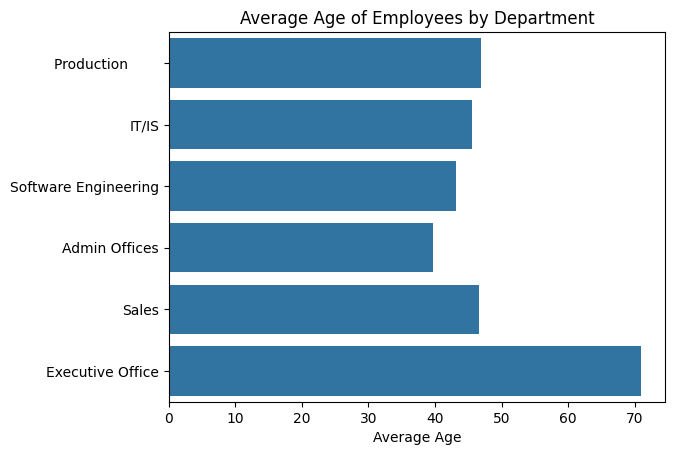

In [55]:
sns.barplot(data = HR_data,
            x = 'Age',
            y = 'Department',
            estimator = 'mean',
            errorbar = None,)

plt.title('Average Age of Employees by Department')
plt.ylabel('')
plt.xlabel('Average Age')
plt.show()


## Question 9
How does employee turnover (termination) vary by department?

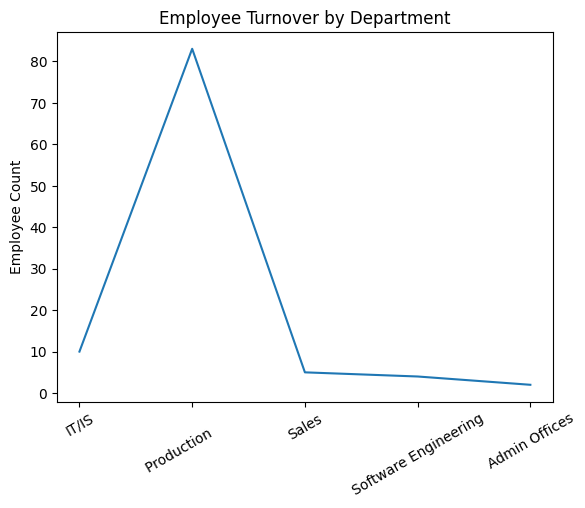

In [57]:
# Filtering only rows where DateofTermination is NOT NULL (employees that are still active)
churned_employees = HR_data[HR_data['DateofTermination'].notnull()]

# Plot (Line)
sns.lineplot(data = churned_employees,
             x = 'Department',
             y = 'EmpID',
             estimator = 'count',
             errorbar = None)

plt.title('Employee Turnover by Department')
plt.xlabel('')
plt.ylabel('Employee Count')
plt.xticks(rotation=30)
plt.show()


## Question 10
What is the distribution of special projects count among employees?

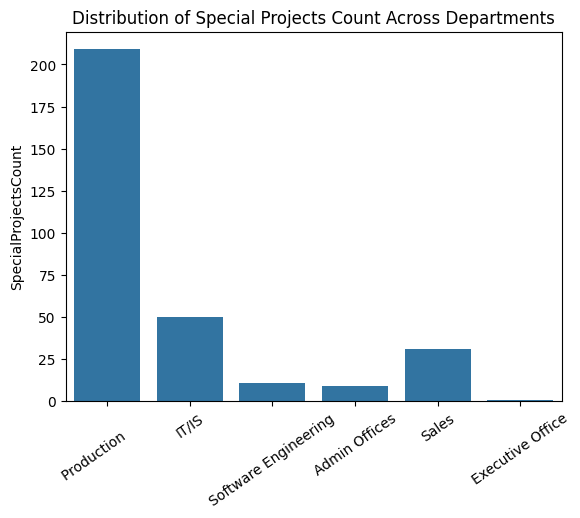

In [70]:
sns.barplot(data = HR_data,
            x = 'Department',
            y = 'SpecialProjectsCount',
            estimator = 'count',
            errorbar = None)

plt.title('Distribution of Special Projects Count Across Departments')
plt.xlabel('Special Projects Count')
plt.xticks(rotation=35)
plt.xlabel('')
plt.show()
